## Exercice 3.13 - A simple question

_Mehdi-Lou Pigeard + Benjamin Lapostolle_

_________________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the data

In [ ]:
data = pd.read_csv('data.txt', sep=' ')
data.head()

,X1,X2
1,0.331273,0.820210
2,0.000000,0.536747
3,0.000000,0.100875
4,0.000000,0.006904
5,0.537947,1.027491


In [ ]:
data.describe()

,X1,X2
count,20000.000000,20000.000000
mean,0.269696,0.530402
std,0.320243,0.864513
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.106811,0.118834
75%,0.519139,0.732757
max,0.999784,8.470366


## Create the normalized data $V$

In [ ]:
def ranktransformer(data):
    """

    Inputs :
    - data : pandas.core.frame.DataFrame of size (2, n)

    Output :
    - V : pandas.core.frame.DataFrame of size (4, n) including the two standardized columns V_1 and V_2

    """
    V=data.copy()
    n=len(data)

    def F_1(x):
      return len(data.loc[data['X1']<=x])/(n+1)

    def F_2(x):
      return len(data.loc[data['X2']<=x])/(n+1)

    V['V1']=data['X1'].apply(lambda x:1/(1-F_1(x)))
    V['V2']=data['X2'].apply(lambda x:1/(1-F_2(x)))

    return V


In [ ]:
V = ranktransformer(data)
V.head()

,X1,X2,V1,V2
1,0.331273,0.820210,2.791876,4.393893
2,0.000000,0.536747,1.744375,3.237455
3,0.000000,0.100875,1.744375,1.954941
4,0.000000,0.006904,1.744375,1.739369
5,0.537947,1.027491,4.176446,5.394013


## Estimation of the limit of $P(V_2 >\lambda t|V_1 >t)$ as $t →∞$

For all $\lambda>0$ we define $p_t(\lambda)=P(V_2 >\lambda t|V_1 >t)$.

By definition, we have $P_t(\lambda) = \frac{P(V_2 >\lambda t \cap V_1 >t)}{P(V_1>t)}$.

$P_t(\lambda) = \frac{P(t^{—1}V_2 > \lambda \cap t^{-1}V_1>1)}{P(V_1t^{-1}>1)}$

$P_t(\lambda) = \frac{tP(t^{—1}V_2 > \lambda \cap t^{-1}V_1>1)}{tP(V_1t^{-1}>1)}$

Defining $A_\lambda=\{(x, y) | x<1, y<\lambda\}$ and $B=\{x|x<1\}$ then

$P_t(\lambda) = \frac{tP(t^{-1}V \in A_\lambda^C)}{tP(t^{-1}V \in B^C)}$

Using Lemma 3.14 from the course, we obtain that

$\underset{t→+∞}{\lim}P_\lambda(t) = \frac{\mu(A_\lambda^C)}{\mu(B^C)}$

To empirically estiate the limit, we are going to estimate the true probabilities using their empirical counterparts based on the available data and using the $k^{th}$ order statistic for $t$:

$\hat{\mu}(A_\lambda^C)=\frac{1}{n}\sum_{i=1}^n 1_{\{ V_{i, 1}\geq V_1^{(k)} , V_{i, 2}\geq \lambda V_1^{(k)}\}}$


$\hat{\mu}(B^C)=\frac{1}{n}\sum_{i=1}^n 1_{\{ V_{i, 1}\geq V_1^{(k)} \}}$

And therefore,

$\hat{p}_k(\lambda)=\frac{\sum_{i=1}^n 1_{\{ V_{i, 1}\geq V_1^{(k)} , V_{i, 2}\geq \lambda V_1^{(k)}\}}}{\sum_{i=1}^n 1_{\{ V_{i, 1}\geq V_1^{(k)} \}}}$

In [ ]:
def p_k_estimator(data, krange, lamb):
    """

    Inputs :
    - data : output of ranktransformer() function on a pandas.core.frame.DataFrame
    - krange : list of values of k for which the estimator must be computed (size m)
    - lamb : lambda value for the estimation

    Output :
    - p_k_values : list of estimated probabilities of same length as krange (size m)

    """
    p_k_values=list()
    for k in krange:
        k_order_stat = data['V1'].sort_values(ascending=True).iloc[k-1]
        mu_A = len(data.loc[(data['V1']>=k_order_stat) & (data['V2']>=lamb*k_order_stat)])
        mu_B = len(data.loc[(data['V1']>=k_order_stat)])
        p_k_values.append(mu_A/mu_B)
    return p_k_values

In [ ]:

data=pd.read_csv('data.txt', sep=' ')
normalized_data=ranktransformer(data)



[]

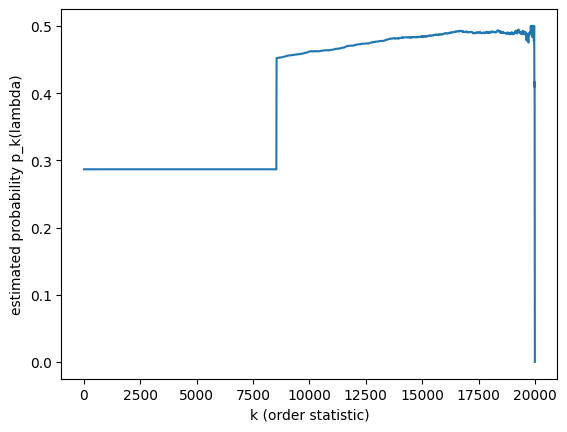

In [ ]:
lamb=2
nb_points=2000
krange=np.linspace(1, len(data), nb_points, dtype=int)
p_k_values=p_k_estimator(normalized_data, krange, lamb)
fig, ax = plt.subplots()
ax.plot(krange, p_k_values)
ax.set_xlabel('k (order statistic)')
ax.set_ylabel('estimated probability p_k(lambda)')
plt.plot()

We can identify reasonable range for $k \in [10.000, 17.500]$

[]

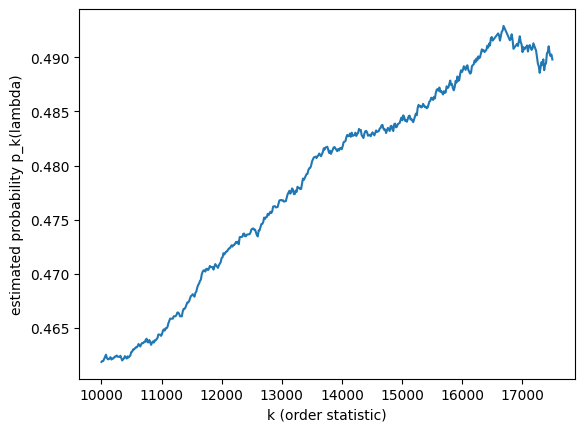

In [ ]:
krange_reasonable=np.linspace(10000, 17500, 500, dtype=int)
p_k_values=p_k_estimator(normalized_data, krange_reasonable, lamb)
fig, ax = plt.subplots()
ax.plot(krange_reasonable, p_k_values)
ax.set_xlabel('k (order statistic)')
ax.set_ylabel('estimated probability p_k(lambda)')
plt.plot()

In [ ]:
print('Avg of estimated probability = ', np.mean(np.array(p_k_values)))
print('Std of estimated probability = ', np.std(np.array(p_k_values)))

Avg of estimated probability =  0.4786462912471854
Std of estimatted probability =  0.0095882248967277
